## Declare the necessary libraries

In [159]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_predict

C:\Users\HP\AppData\Local\Temp\ipykernel_16508\2858304008.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [160]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

## input data

In [161]:
File_Input_Path = "shampoo.csv"

series = pd.read_csv(File_Input_Path, parse_dates=[0], date_parser=parser)

In [162]:
series.head(4)

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3


In [163]:
series= series.set_index('Month')
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


# Data Preparation Make the data non-seasonal

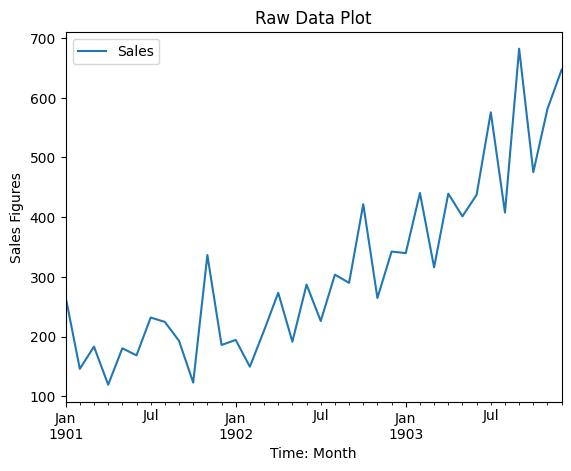

Seems that data is non-seasonal


In [164]:
series.plot()
plt.xlabel("Time: Month")
plt.ylabel("Sales Figures")
plt.title("Raw Data Plot")
plt.show()

print("Seems that data is non-seasonal")

In [165]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(series)
print(result)

(3.0601420836411797, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.9972644263031)


In [166]:
series['new_value']=series['Sales']-series['Sales'].shift(1)

In [167]:
series.head()

,Sales,new_value
Month,,
1901-01-01,266.0,NaN
1901-02-01,145.9,-120.1
1901-03-01,183.1,37.2
1901-04-01,119.3,-63.8
1901-05-01,180.3,61.0


In [168]:
series=series.dropna()
series.head(3)

,Sales,new_value
Month,,
1901-02-01,145.9,-120.1
1901-03-01,183.1,37.2
1901-04-01,119.3,-63.8


In [169]:
def adfuller_test(sales):
    result=adfuller(sales)
    
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")

In [140]:
adfuller_test(series['new_value'].dropna())
# print(result)

is stationary


In [141]:
# drop others column
series=series.drop(['Sales'],axis=1)

In [143]:
series.head()

,new_value
Month,
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8


## Model Identification
# ACF plot

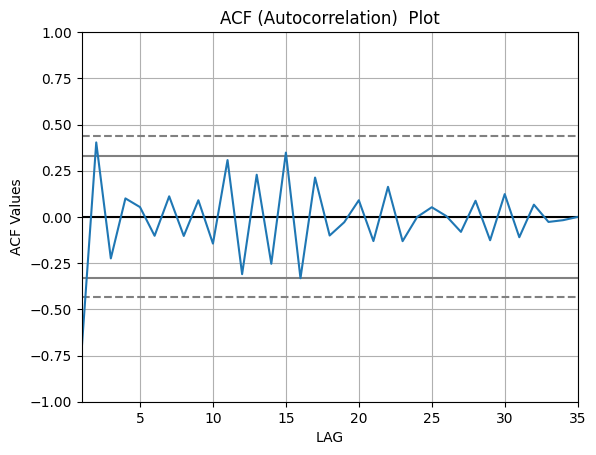

Seems that correlation value start to sharp decay at lag 5


In [109]:
autocorrelation_plot(series)
plt.xlabel("LAG")
plt.ylabel("ACF Values")
plt.title("ACF (Autocorrelation)  Plot")
plt.show()

print("Seems that correlation value start to sharp decay at lag 5")

In [144]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

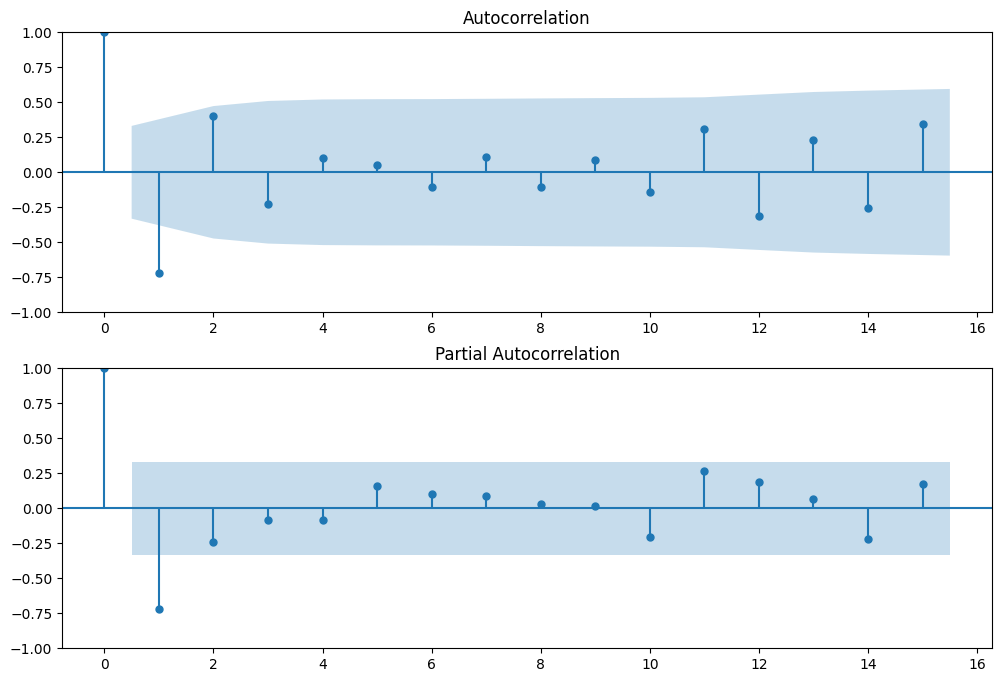

In [145]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series,lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series,lags=15,ax=ax2)

In [146]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [147]:
autoarima_model = auto_arima(series, trace=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=406.022, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409.013, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=429.229, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=403.628, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=404.692, Time=0.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=404.286, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=402.467, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=401.531, Time=1.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.77 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
To

# Create an ARIMA model AR(1,1,2)

In [148]:
size = int(len(series) * 0.85)
train= series[:size]
test= series[size:]

In [149]:
len(train)

29

In [155]:
# model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model=ARIMA(train,order=(0,0,0))
results=model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Fit the model

# test data prediction using forecast 


In [156]:
forecast=results.forecast(steps=len(test))
#  we can use this also for prediction
# forecast=results.predict(start=len(train)+1 ,end=len(df), dynamic=True)

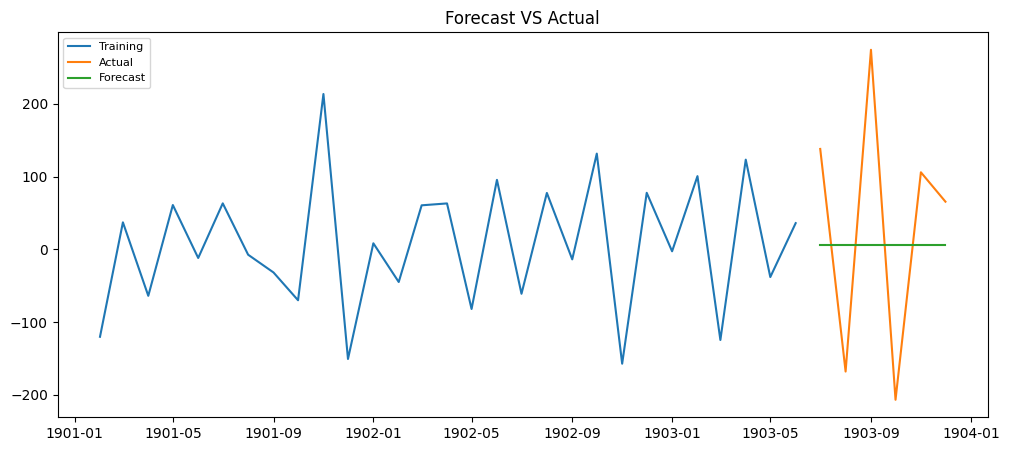

In [157]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
# # plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# error find

In [153]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [158]:
rmse= sqrt(mean_squared_error(forecast,test))
rmse

172.50835239437475

## future forecast

In [121]:
forecast_steps = len(test) 
# forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = results.forecast(steps=forecast_steps+20) 

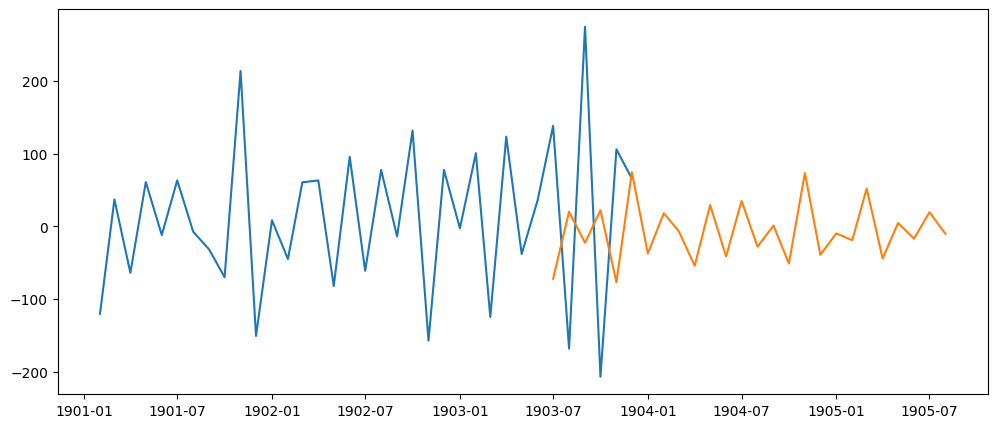

In [122]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(series, label='Training')
plt.plot(forecast, label='Forecast')

In [123]:
forecast

1903-07-01   -71.903190
1903-08-01    20.194734
1903-09-01   -22.501610
1903-10-01    22.216983
1903-11-01   -76.611537
1903-12-01    74.618166
1904-01-01   -37.325279
1904-02-01    18.202035
1904-03-01    -6.475809
1904-04-01   -54.072939
1904-05-01    29.305728
1904-06-01   -41.203807
1904-07-01    35.102677
1904-08-01   -27.849583
1904-09-01     1.227696
1904-10-01   -51.060359
1904-11-01    73.404075
1904-12-01   -39.061947
1905-01-01    -9.660933
1905-02-01   -18.989706
1905-03-01    52.055571
1905-04-01   -44.134300
1905-05-01     4.729987
1905-06-01   -16.837661
1905-07-01    19.535390
1905-08-01   -10.249327
Freq: MS, Name: predicted_mean, dtype: float64

## make future prediction


In [124]:
# future_datest_df=pd.DataFrame(index=future_dates[0:])


future_datest_df=pd.date_range(start='1903-12-01',end='1905-12-01' , freq='MS')

future_datest_df=pd.DataFrame(index=future_datest_df)
# future_datest_df.head(20)

In [125]:
future_datest_df= results.predict(start = 35, end = 60, dynamic= True)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [126]:
future_datest_df

1904-01-01   -37.325279
1904-02-01    18.202035
1904-03-01    -6.475809
1904-04-01   -54.072939
1904-05-01    29.305728
1904-06-01   -41.203807
1904-07-01    35.102677
1904-08-01   -27.849583
1904-09-01     1.227696
1904-10-01   -51.060359
1904-11-01    73.404075
1904-12-01   -39.061947
1905-01-01    -9.660933
1905-02-01   -18.989706
1905-03-01    52.055571
1905-04-01   -44.134300
1905-05-01     4.729987
1905-06-01   -16.837661
1905-07-01    19.535390
1905-08-01   -10.249327
1905-09-01    21.648779
1905-10-01     5.871397
1905-11-01   -19.142286
1905-12-01     3.240664
1906-01-01    20.171102
1906-02-01    -4.129194
Freq: MS, Name: predicted_mean, dtype: float64

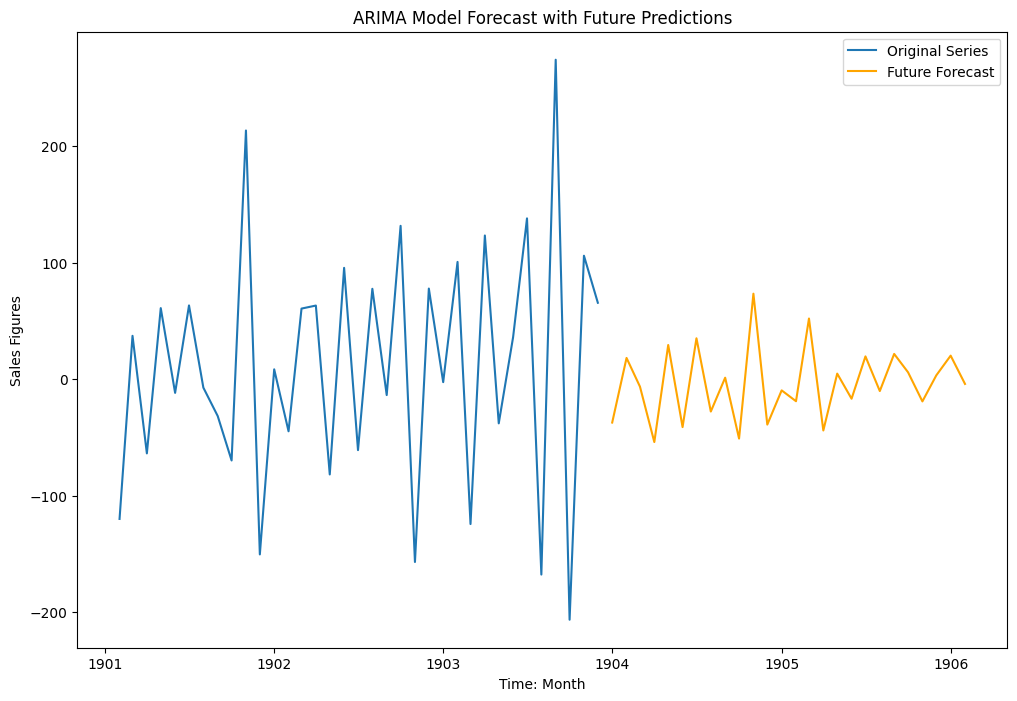

In [127]:
plt.figure(figsize=(12, 8))
plt.plot(series, label='Original Series')
plt.plot(future_datest_df, color='orange', label='Future Forecast')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()